In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [20]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [21]:
print(tf.test.is_built_with_cuda())

True


In [22]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [23]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [6]:
img_array = cv2.imread("Fer2013/Fer2013/train/angry/Training_76136259.jpg")

In [7]:
img_array.shape
# rgb as 3 channels
# 48 x 48 --> too small image

(48, 48, 3)

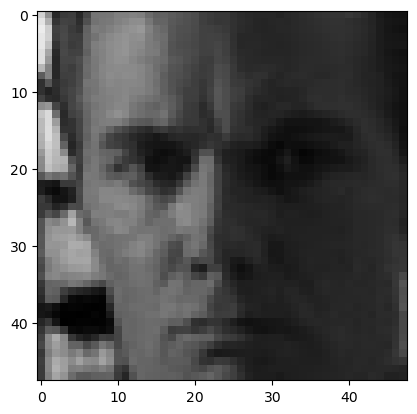

In [8]:
plt.imshow(img_array)  # BGR image

In [9]:
dataDir = "Fer2013/Fer2013/train/"  # training dataset

In [10]:
classes = ['angry','disgust','fear','happy','neutral','sad','surprise']

## Reading all of the images

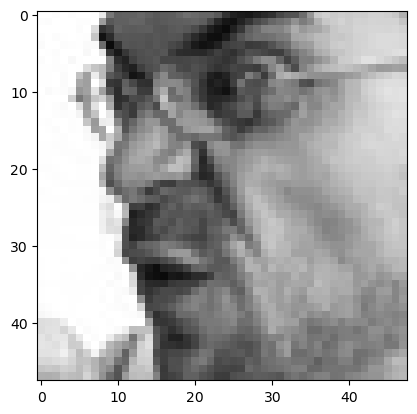

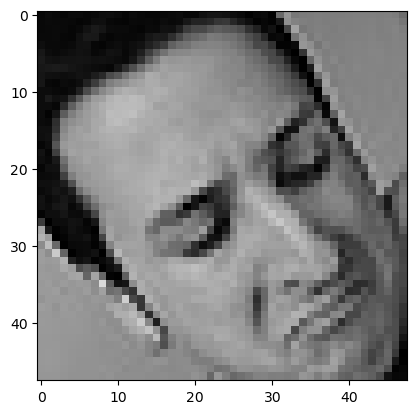

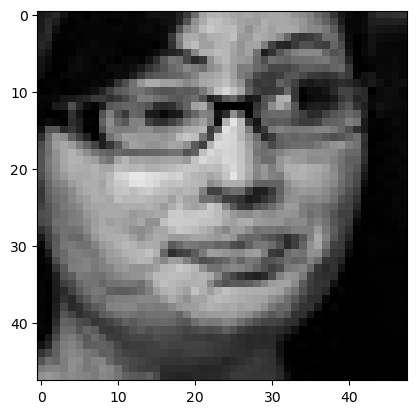

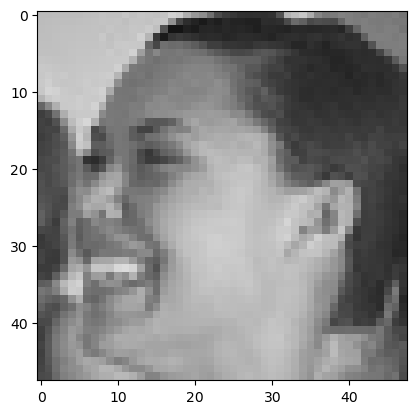

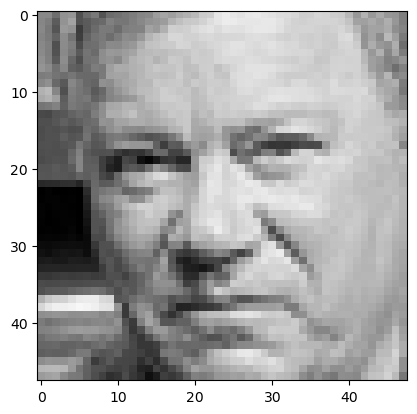

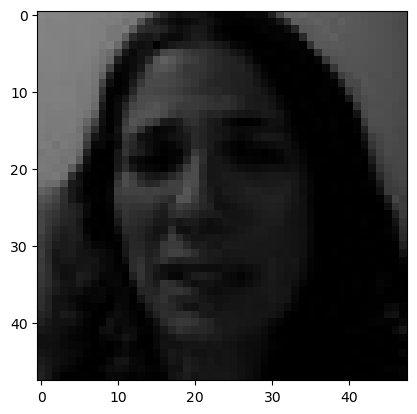

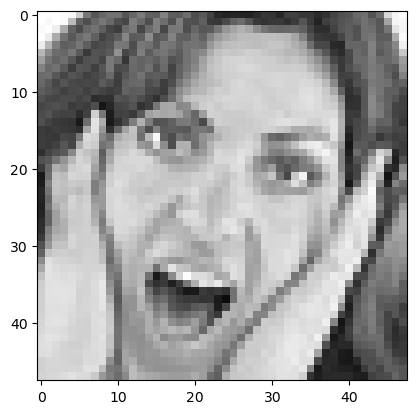

In [4]:
for category in classes:
    path_class = os.path.join(dataDir,category)
    for image in os.listdir(path_class):
        
        path_img = os.path.join(path_class, image)
        img_array = cv2.imread(path_img)
        
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        
        break # break to only show the 1st image of every class
        

ImageNet has size 224 X 224. So we need to resize our image

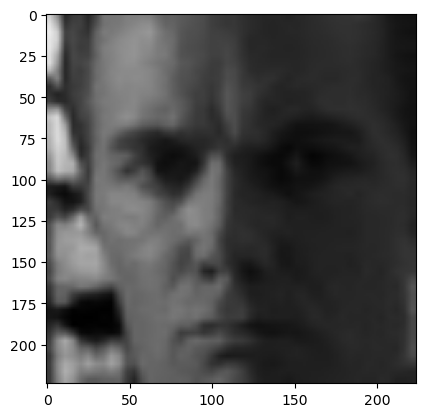

In [11]:
img_size = 224
img_resized = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
plt.show()

In [12]:
img_resized.shape

(224, 224, 3)

In [ ]:
print(img_resized)

## Read all the images and convert them into resized array

In [13]:
training_Data = []  # resized array

def create_training_data():
    for category in classes:
        
        path_class = os.path.join(dataDir,category)
        class_num = classes.index(category)
        
        for image in os.listdir(path_class):
            try:
                path_img = os.path.join(path_class, image)
                img_array = cv2.imread(path_img)
                img_resized = cv2.resize(img_array, (img_size, img_size))
                training_Data.append([img_resized, class_num])
                
            except Exception as e:
                pass

In [14]:
create_training_data()

In [15]:
len(training_Data)

6449

In [16]:
training_Data

[[array([[[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [178, 178, 178],
          [177, 177, 177],
          [177, 177, 177]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [178, 178, 178],
          [177, 177, 177],
          [177, 177, 177]],
  
         [[255, 255, 255],
          [255, 255, 255],
          [255, 255, 255],
          ...,
          [178, 178, 178],
          [178, 178, 178],
          [178, 178, 178]],
  
         ...,
  
         [[176, 176, 176],
          [176, 176, 176],
          [175, 175, 175],
          ...,
          [183, 183, 183],
          [183, 183, 183],
          [183, 183, 183]],
  
         [[175, 175, 175],
          [175, 175, 175],
          [175, 175, 175],
          ...,
          [183, 183, 183],
          [183, 183, 183],
          [183, 183, 183]],
  
         [[175, 175, 175],
          [175, 175, 175],
          [175, 175, 175

In [11]:
df = pd.DataFrame(training_Data)
df

,0,1
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
1,"[[[8, 8, 8], [8, 8, 8], [8, 8, 8], [8, 8, 8], ...",0
2,"[[[63, 63, 63], [63, 63, 63], [63, 63, 63], [6...",0
3,"[[[49, 49, 49], [49, 49, 49], [49, 49, 49], [5...",0
4,"[[[213, 213, 213], [213, 213, 213], [212, 212,...",0
...,...,...
6444,"[[[27, 27, 27], [27, 27, 27], [27, 27, 27], [2...",6
6445,"[[[7, 7, 7], [7, 7, 7], [7, 7, 7], [7, 7, 7], ...",6
6446,"[[[124, 124, 124], [124, 124, 124], [124, 124,...",6
6447,"[[[242, 242, 242], [242, 242, 242], [242, 242,...",6


In [12]:
temp = np.array(training_Data)
temp.shape

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1984\115100705.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp = np.array(training_Data)


(6449, 2)

In [17]:
# Shuffling the training_Data so that DL architecture doesn't learn any sequence

import random

random.shuffle(training_Data) 

In [18]:
X = []  # data/features
y = []  # labels

for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1,img_size, img_size, 3)

In [57]:
# X = np.array(X)
# # number of img, height, width, channels

In [19]:
X.shape

(6449, 224, 224, 3)

In [20]:
# Normalize the data

# from sklearn import preprocessing
# min_max_scaler = preprocessing.MinMaxScaler()
# X_minmax = min_max_scaler.fit_transform(X) 

X = X/255.0

In [17]:
X # Normalized array

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [0.99215686, 0.99215686, 0.99215686],
         ...,
         [0.99215686, 0.99215686, 0.99215686],
         [0.99215686, 0.99215686, 0.99215686],
         [0.99215686, 0.99215686, 0.99215686]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [0.99215686, 0.99215686, 0.99215686],
         ...,
         [0.99215686, 0.99215686, 0.99215686],
         [0.99215686, 0.99215686, 0.99215686],
         [0.99215686, 0.99215686, 0.99215686]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [0.99215686, 0.99215686, 0.99215686],
         ...,
         [0.99215686, 0.99215686, 0.99215686],
         [0.99215686, 0.99215686, 0.99215686],
         [0.99215686, 0.99215686, 0.99215686]],

        ...,

        [[0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843]

In [32]:
X = np.array(X)
y = np.array(y)

MemoryError: Unable to allocate 7.23 GiB for an array with shape (6449, 224, 224, 3) and data type float64

In [18]:
y.shape

list

## DL model - Transfer Learning

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [22]:
model = tf.keras.applications.MobileNetV2() # Pre-trained model 

In [23]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

### Transfer learning - Tuning, weights will start from last check point

In [24]:
base_input = model.layers[0].input # taking the First layer input

In [25]:
base_output = model.layers[-2].output  # taking the 2nd last layer

In [26]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [27]:
# 1st Layer
final_output = layers.Dense(128)(base_output) # Adding new layer, after the output of global pooling layer
final_output = layers.Activation('relu')(final_output) # Activation function

# 2nd Layer
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)

# Final layer - 7 classes
final_output = layers.Dense(7, activation='softmax')(final_output) # classification layer


In [28]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [29]:
new_model = keras.Model(inputs = base_input, outputs=final_output)
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [30]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",metrics=["accuracy"])

In [31]:
training_history = new_model.fit(X,y,epochs=80)

ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, (<class 'list'> containing values of types {"<class 'int'>"})

## Save the model

In [ ]:
new_model.save('fer2013_transfer_model.h5')

## Load the model

In [ ]:
loaded_model = tf.keras.models.load_model('fer2013_transfer_model.h5')

## Evaluate the model

In [ ]:
new_model.evaluate  # test the data

## Test the model from downloaded images

In [ ]:
frame = cv2.imread('happyboy.jpg')